In [144]:
# Import the main libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data preprocessing

#### Let's load the dataset and explore its composition:

In [146]:
df = pd.read_csv('nanotox_dataset.csv')
df.head()

,NPs,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen,class
0,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.001,1.61,3,nonToxic
1,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.010,1.61,3,nonToxic
2,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.100,1.61,3,nonToxic
3,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,1.000,1.61,3,nonToxic
4,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,5.000,1.61,3,nonToxic


#### We can see that the dataset has 10 different columns depicting attributes from the NPs and one target column (class) for toxic or non-toxic NPs. We can see how many unique elements we have in each column and the datatype:

In [148]:
# ANSI escape codes for red and blue text
RED = '\033[91m'
BLUE = '\033[94m'
RESET = '\033[0m'  # Resets color to default

for col in df.columns:
    num_unique_values = df[col].nunique()
    if pd.api.types.is_numeric_dtype(df[col]):
        dtype = f"{BLUE}numerical{RESET}"  # Make "numerical" blue
    else:
        dtype = f"{RED}categorical{RESET}"  # Make "categorical" red

    print(f"Column '{col}' has {num_unique_values} unique {dtype} items")

Column 'NPs' has 5 unique categorical items
Column 'coresize' has 21 unique numerical items
Column 'hydrosize' has 29 unique numerical items
Column 'surfcharge' has 24 unique numerical items
Column 'surfarea' has 23 unique numerical items
Column 'Ec' has 5 unique numerical items
Column 'Expotime' has 6 unique numerical items
Column 'dosage' has 24 unique numerical items
Column 'e' has 5 unique numerical items
Column 'NOxygen' has 3 unique numerical items
Column 'class' has 2 unique categorical items


#### NPs and class columns present categorical data. We will take care of this later in order to prepare the dataset for the selected model.

In [150]:
for col in df.columns:
    missing_values = df[col].isnull().sum()
    if missing_values == 0:
        result = f"{BLUE}{missing_values} missing values{RESET}"
    else:
        result = f"{RED}{missing_values} missing values{RESET}"

    print(f"Column '{col}' has {result}")

Column 'NPs' has 0 missing values
Column 'coresize' has 0 missing values
Column 'hydrosize' has 0 missing values
Column 'surfcharge' has 0 missing values
Column 'surfarea' has 0 missing values
Column 'Ec' has 0 missing values
Column 'Expotime' has 0 missing values
Column 'dosage' has 0 missing values
Column 'e' has 0 missing values
Column 'NOxygen' has 0 missing values
Column 'class' has 0 missing values


#### Now is a good moment to encode the categorical values. For that, we will be using LabelEncoder

In [152]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [153]:
df.head()

,NPs,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen,class
0,0,39.7,267.0,36.3,64.7,-1.51,24,0.001,1.61,3,1
1,0,39.7,267.0,36.3,64.7,-1.51,24,0.010,1.61,3,1
2,0,39.7,267.0,36.3,64.7,-1.51,24,0.100,1.61,3,1
3,0,39.7,267.0,36.3,64.7,-1.51,24,1.000,1.61,3,1
4,0,39.7,267.0,36.3,64.7,-1.51,24,5.000,1.61,3,1


#### We can see how the two categorical columns have been encoded:

 #### 1. 'Nps' column had 5 unique categorical values before. After the encoding we have 0 for Al2O3, 1 for CuO, 2 for Fe2O3, 3 for TiO2 and 4 for ZnO
 #### 2. 'class' column had 2 unique categorical values before. After the encoding we have 0 for toxic and 1 for nontoxic

#### Finally, let's make a simple statistical analysis of the numerical columns in our dataset, since may be useful at some point.

In [156]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NPs,881.0,3.476731,0.940124,0.00000,3.00,4.00,4.00,4.00
coresize,881.0,56.313280,33.700297,7.50000,32.00,45.30,86.00,125.00
hydrosize,881.0,513.781385,346.601373,74.00000,273.40,327.00,687.00,1843.00
surfcharge,881.0,1.642111,25.635780,-41.60000,-11.70,-9.30,29.40,42.80
surfarea,881.0,42.074075,47.111739,7.00000,15.00,24.10,42.50,210.00
Ec,881.0,-4.018127,0.509806,-5.17000,-4.16,-3.89,-3.89,-1.51
Expotime,881.0,27.459705,19.534667,3.00000,12.00,24.00,24.00,72.00
dosage,881.0,39.651270,38.163289,0.00001,10.00,25.00,50.00,300.00
e,881.0,1.646050,0.089304,1.54000,1.65,1.65,1.65,1.90
NOxygen,881.0,1.308740,0.543581,1.00000,1.00,1.00,2.00,3.00


## Exploratory Data Analysis

#### A good way to start visualising the data is by plotting a correlation map that will show the correlation between the different columns:

Text(0.5, 1.0, 'Correlation map')

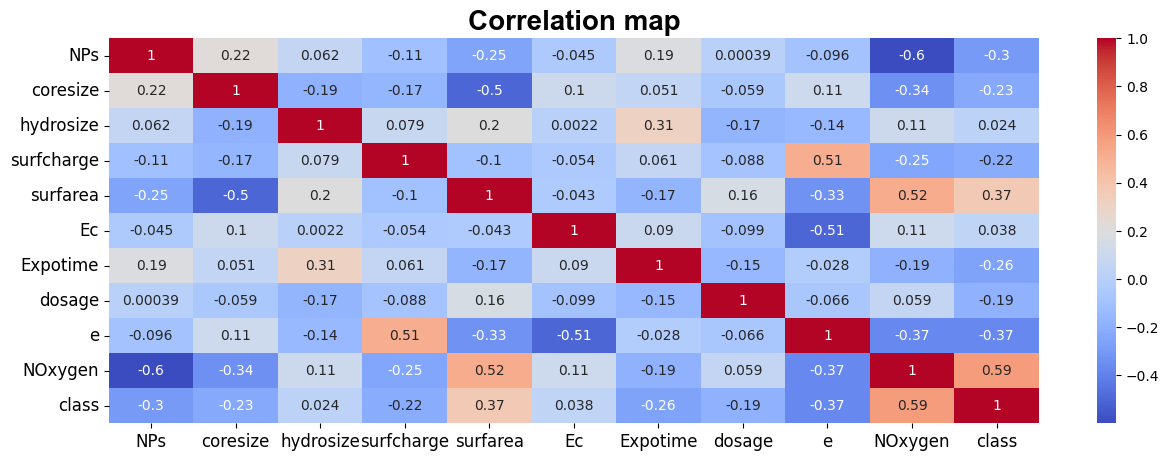

In [158]:
corr = df.corr()

plt.figure(figsize=(15,5))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Correlation map', fontsize = 20, fontweight='bold', **csfont)

#### From the correlation map we can see that almost all the columns are correlated with the target column. We have a high correlation in especial with the NOxygen column, denoting that the higher the number of oxygen atoms in the NPs, the higher the possibility of having toxic nanoparticles, since the oxygen in the surface of the NPs can lead to the generation of reactive oxygen species (ROS) that can produce cellular damage and toxic effects.

#### Another important correlated feature is the surface area, since the higher the surface area of the NPs, the higher the possibility of interaction and damage to the surrounding tissues/cells.

#### We can also see that there are some negatively correlated columns, such as the type of NP, the e column, or the surface charge, meaning that when one parameter increases, the other one decreases.

#### Since we do not have any column showing a higher correlation than 0.9 (or lower than -0.9), we are going to maintain all the columns in the dataset. This means that we do not have any redundant data and we are not in a multicolinearity situation.

#### We can also perform a Chi-Square test to explore the significant associations between the target column and the different columns in the dataset.

In [161]:
target_col = 'class'   # Define the target column
features = [col for col in df.columns if col != target_col]

# Function to perform chi-square test
def chi_square_test(data, target):
    results = {}  # Store results
    for col in data.columns:
        if col != target:
            # Create contingency table
            contingency_table = pd.crosstab(data[col], data[target])
            
            # Perform chi-square test
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            
            # Store results
            results[col] = {'chi2': chi2, 'p-value': p}
    
    return results  # Make sure to return the dictionary

# Run the Chi-Square Test
from scipy.stats import chi2_contingency
chi_square_results = chi_square_test(df, target_col)

from colorama import Fore, Style
# Print Results
print("Chi-Square Test Results: \n")
print("===" * 22)

for feature, result in chi_square_results.items():
    chi2_value = result['chi2']
    p_value = result['p-value']

    # Check if Chi2 is positive or negative and set color
    if p_value < 0.05:
        color = Fore.GREEN
    else:
        color = Fore.RED

    # Print the result with color
    print(color + f"{feature}: Chi2 = {chi2_value:.4f}, p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"   {feature} is significantly associated with the target column.")
    else:
        print(f"   {feature} is NOT significantly associated with the target column.")

    # Reset color and print separator
    print(Style.RESET_ALL + "===" * 22)

Chi-Square Test Results: 

NPs: Chi2 = 344.8458, p-value = 0.0000
   NPs is significantly associated with the target column.
coresize: Chi2 = 386.0474, p-value = 0.0000
   coresize is significantly associated with the target column.
hydrosize: Chi2 = 403.8013, p-value = 0.0000
   hydrosize is significantly associated with the target column.
surfcharge: Chi2 = 386.4322, p-value = 0.0000
   surfcharge is significantly associated with the target column.
surfarea: Chi2 = 386.2706, p-value = 0.0000
   surfarea is significantly associated with the target column.
Ec: Chi2 = 346.9846, p-value = 0.0000
   Ec is significantly associated with the target column.
Expotime: Chi2 = 128.5687, p-value = 0.0000
   Expotime is significantly associated with the target column.
dosage: Chi2 = 423.4038, p-value = 0.0000
   dosage is significantly associated with the target column.
e: Chi2 = 346.9846, p-value = 0.0000
   e is significantly associated with the target column.
NOxygen: Chi2 = 344.1558, p-value =

## Train/test split

In [163]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

#### Before feeding the model with the data, we are going to us StandardScaler to normalise it:

In [165]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model selection

#### We are going to train different models that are suitable for binary classification tasks, and finally we will use the best three of them.

### Logistic Regression

In [168]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)

LogisticRegression()

Accuracy Score (Logistic Regression model): 88.70056497175142 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

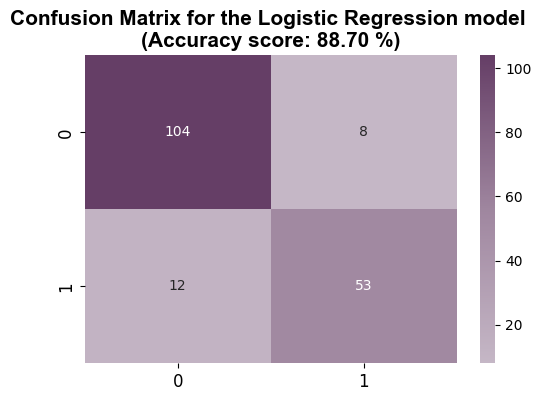

In [169]:
lr_ypred = classifier_lr.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy Score (Logistic Regression model):", accuracy_score(y_test, lr_ypred)*100, "%") # Print the accuracy score for the predictions

cm_lr = confusion_matrix(y_test, lr_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the Logistic Regression model \n(Accuracy score: {accuracy_score(y_test, lr_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

### K-Nearest Neighbors 

In [171]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

classifier_kn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # Initialise a standard KNN classifier

param_grid = {'n_neighbors': range(1,21)}  # Define the range of neighbors to test
grid_search = GridSearchCV(estimator = classifier_kn, param_grid = param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)
optimal_neighbors = grid_search.best_params_['n_neighbors']  # extract the optimal number of neighbors
best_score = grid_search.best_score_
print(f"Optimal number of neighbors: {optimal_neighbors}")
print(f"Best cross-validation accuracy: {best_score}")

classifier_kn = KNeighborsClassifier(n_neighbors = optimal_neighbors, metric = 'minkowski', p = 2) # Redo the KNN clasiffier with optimal neighbors
classifier_kn.fit(X_train, y_train)

Optimal number of neighbors: 1
Best cross-validation accuracy: 0.9517223910840931


KNeighborsClassifier(n_neighbors=1)

Accuracy Score (K-Nearest Neighbors model): 93.22033898305084 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

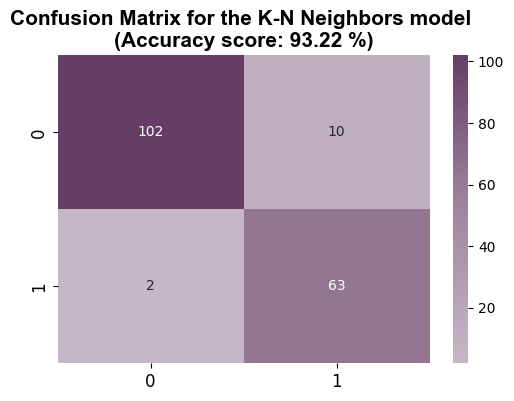

In [172]:
kn_ypred = classifier_kn.predict(X_test)

print("Accuracy Score (K-Nearest Neighbors model):", accuracy_score(y_test, kn_ypred)*100, "%") # Print the accuracy score for the predictions

cm_kn = confusion_matrix(y_test, kn_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_kn, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the K-N Neighbors model \n(Accuracy score: {accuracy_score(y_test, kn_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

### Support Vector Machine

In [174]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear', random_state = 19)
classifier_svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=19)

Accuracy Score (Support Vector Machine model): 89.26553672316385 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

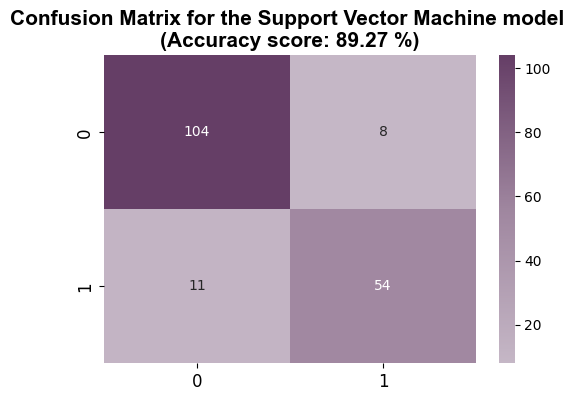

In [175]:
svc_ypred = classifier_svc.predict(X_test)

print("Accuracy Score (Support Vector Machine model):", accuracy_score(y_test, svc_ypred)*100, "%") # Print the accuracy score for the predictions

cm_svc = confusion_matrix(y_test, svc_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_svc, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the Support Vector Machine model \n(Accuracy score: {accuracy_score(y_test, svc_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

### Naive Bayes

In [177]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

Accuracy Score (Naive Bayes model): 81.35593220338984 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

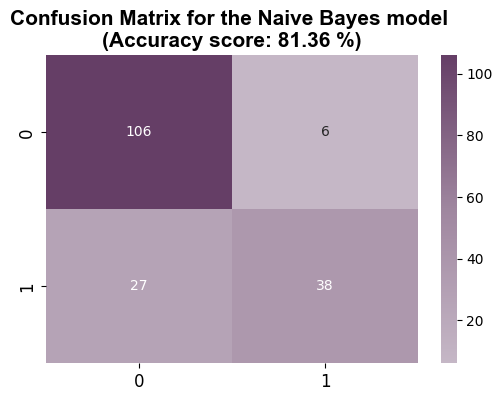

In [178]:
nb_ypred = classifier_nb.predict(X_test)

print("Accuracy Score (Naive Bayes model):", accuracy_score(y_test, nb_ypred)*100, "%") # Print the accuracy score for the predictions

cm_nb = confusion_matrix(y_test, nb_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the Naive Bayes model \n(Accuracy score: {accuracy_score(y_test, nb_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

### Decision Tree

In [180]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Accuracy Score (Decision Tree model): 98.87005649717514 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

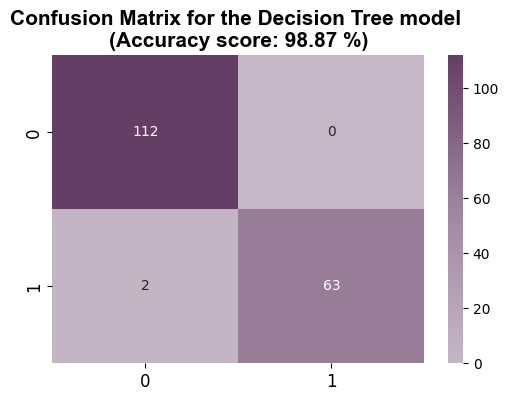

In [181]:
dt_ypred = classifier_dt.predict(X_test)

print("Accuracy Score (Decision Tree model):", accuracy_score(y_test, dt_ypred)*100, "%") # Print the accuracy score for the predictions

cm_dt = confusion_matrix(y_test, dt_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the Decision Tree model \n(Accuracy score: {accuracy_score(y_test, dt_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

### Random Forest

In [183]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

Accuracy Score (Random Forest model): 81.35593220338984 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

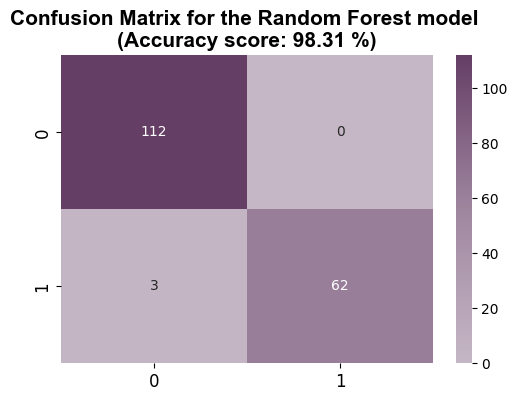

In [184]:
rf_ypred = classifier_rf.predict(X_test)

print("Accuracy Score (Random Forest model):", accuracy_score(y_test, nb_ypred)*100, "%") # Print the accuracy score for the predictions

cm_rf = confusion_matrix(y_test, rf_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the Random Forest model \n(Accuracy score: {accuracy_score(y_test, rf_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

### XGBoost

In [186]:
from xgboost import XGBClassifier
classifier_xg = XGBClassifier()
classifier_xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy Score (XGBoost model): 98.87005649717514 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

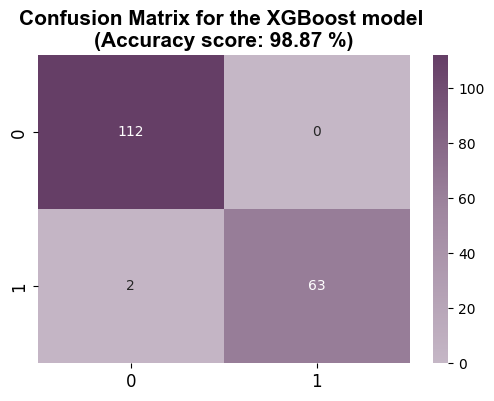

In [187]:
xg_ypred = classifier_xg.predict(X_test)

print("Accuracy Score (XGBoost model):", accuracy_score(y_test, xg_ypred)*100, "%") # Print the accuracy score for the predictions

cm_xg = confusion_matrix(y_test, xg_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_xg, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the XGBoost model \n(Accuracy score: {accuracy_score(y_test, xg_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

### Artificial Neural Network

In [189]:
import tensorflow as tf
tf.__version__

'2.16.1'

In [190]:
ann = tf.keras.models.Sequential()


ann.add(tf.keras.layers.Dense(units = 12, activation = 'relu'))     # Add an input layer
ann.add(tf.keras.layers.Dense(units = 9, activation = 'relu'))      # Add a hidden layer
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))   # Add the final output layer (sigmoid because the output is binary)
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])   # Compile the ANN

ann.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [191]:
ann.fit(X_train, y_train, batch_size = 1, epochs = 5)

Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6036 - loss: 0.7081
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8229 - loss: 0.4257
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8604 - loss: 0.3391
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8853 - loss: 0.3021
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9119 - loss: 0.2480


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Accuracy Score (ANN model): 98.87005649717514 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

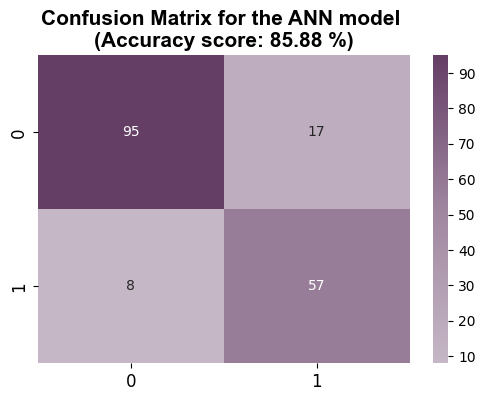

In [192]:
ann_ypred = ann.predict(X_test)
ann_ypred = (ann_ypred > 0.5)

print("Accuracy Score (ANN model):", accuracy_score(y_test, xg_ypred)*100, "%") # Print the accuracy score for the predictions

cm_ann = confusion_matrix(y_test, ann_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_ann, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the ANN model \n(Accuracy score: {accuracy_score(y_test, ann_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

## Models performance

In [194]:
print('=='*15)
print('Model: Logistic Regression')
print(f'Accuracy score: {accuracy_score(y_test, lr_ypred)*100:.2f} %')

print('=='*15)
print('Model: K-Nearest Neighbors')
print(f'Accuracy score: {accuracy_score(y_test, kn_ypred)*100:.2f} %')

print('=='*15)
print('Model: Support Vector Machine')
print(f'Accuracy score: {accuracy_score(y_test, svc_ypred)*100:.2f} %')

print('=='*15)
print('Model: Naive Bayes')
print(f'Accuracy score: {accuracy_score(y_test, nb_ypred)*100:.2f} %')

print('=='*15)
print('Model: Decision Tree')
print(f'Accuracy score: {accuracy_score(y_test, dt_ypred)*100:.2f} %')

print('=='*15)
print('Model: Random Forest')
print(f'Accuracy score: {accuracy_score(y_test, rf_ypred)*100:.2f} %')

print('=='*15)
print('Model: XGBoost')
print(f'Accuracy score: {accuracy_score(y_test, xg_ypred)*100:.2f} %')

print('=='*15)
print('Model: Artificial Neural Network')
print(f'Accuracy score: {accuracy_score(y_test, ann_ypred)*100:.2f} %')

Model: Logistic Regression
Accuracy score: 88.70 %
Model: K-Nearest Neighbors
Accuracy score: 93.22 %
Model: Support Vector Machine
Accuracy score: 89.27 %
Model: Naive Bayes
Accuracy score: 81.36 %
Model: Decision Tree
Accuracy score: 98.87 %
Model: Random Forest
Accuracy score: 98.31 %
Model: XGBoost
Accuracy score: 98.87 %
Model: Artificial Neural Network
Accuracy score: 85.88 %


#### We can see that the top performance is offered by the Decision Tree and the XGBoost models with a 98.87% of accuracy, followed by the Random Forest model with a 98.31% of accuracy. Let's use these three models to try to perform a single prediction.

## Single prediction

In [294]:
test_df = pd.DataFrame({
    'NPs': [1],
    'coresize': [25.3],
    'hydrosize': [226],
    'surfcharge': [42.8],
    'surfarea': [24.1],
    'Ec': [-3.17],
    'Expotime': [21],
    'dosage': [11],
    'e': [1.9],
    'NOxygen': [1],
})

test_NPs = test_df['NPs'].values[0]
test_coresize = test_df['coresize'].values[0]
test_hydrosize = test_df['hydrosize'].values[0]
test_surfcharge = test_df['surfcharge'].values[0]
test_surfarea = test_df['surfarea'].values[0]
test_Ec = test_df['Ec'].values[0]
test_Expotime = test_df['Expotime'].values[0]
test_dosage = test_df['dosage'].values[0]
test_e = test_df['e'].values[0]
test_NOxygen = test_df['NOxygen'].values[0]


In [296]:

XGBoost_pred = classifier_xg.predict(sc.transform([[test_NPs, test_coresize, test_hydrosize, test_surfcharge, test_surfarea, test_Ec, test_Expotime, test_dosage, test_e, test_NOxygen]]))
DecisionTree_pred = classifier_dt.predict(sc.transform([[test_NPs, test_coresize, test_hydrosize, test_surfcharge, test_surfarea, test_Ec, test_Expotime, test_dosage, test_e, test_NOxygen]]))
RandomForest_pred = classifier_rf.predict(sc.transform([[test_NPs, test_coresize, test_hydrosize, test_surfcharge, test_surfarea, test_Ec, test_Expotime, test_dosage, test_e, test_NOxygen]]))


In [298]:
# Define color codes for red and green
RED = '\033[91m'    # Red color code
GREEN = '\033[92m'  # Green color code
RESET = '\033[0m'   # Reset color code

def print_prediction(pred, model_name):
    if pred == 0:
        result = f"{RED}Toxic{RESET}"
    else:
        result = f"{GREEN}Non-Toxic{RESET}"
    print(f"{model_name} Prediction: {result}")

# Print predictions with appropriate colors
print_prediction(RandomForest_pred, "Random Forest")
print_prediction(DecisionTree_pred, "Decision Tree")
print_prediction(XGBoost_pred, "XGBoost")

Random Forest Prediction: Toxic
Decision Tree Prediction: Toxic
XGBoost Prediction: Non-Toxic
